In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import itertools
import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import  train_test_split
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import  collections
import os

In [2]:
 from google.colab import drive
 import numpy as np
 import pandas as pd 
 import pickle

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
coautors = pd.read_csv('/content/gdrive/MyDrive/coauthorship.edgelist',sep = ' ',header = None)
#nx.from_pandas_edgelist()

In [5]:
small_G = nx.from_pandas_edgelist(coautors[:250],source = 0,target = 1,create_using=nx.Graph())


In [6]:
small_G = nx.from_pandas_edgelist(coautors[:250],source = 0,target = 1,create_using=nx.Graph())


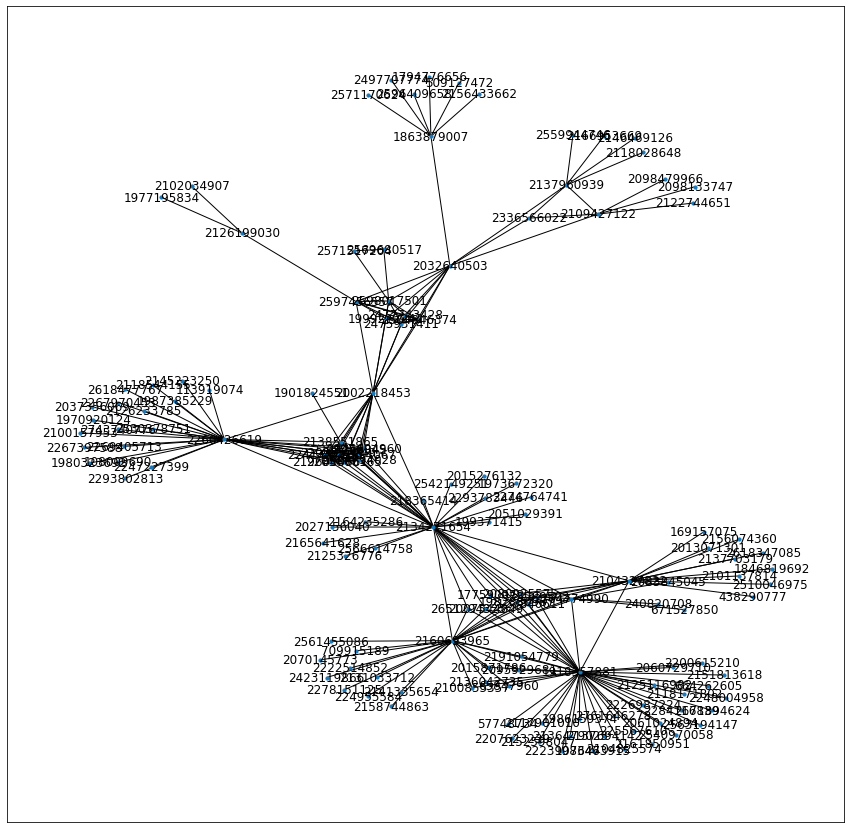

In [7]:
plt.figure (figsize = (15,15))
nx.draw_networkx(small_G,node_size=10)

In [8]:
G = nx.from_pandas_edgelist(coautors,source = 0,target = 1)

In [9]:
## Degrees
degrees = G.degree()

In [10]:
## Neighbor's average degree
neighbors_degrees = nx.average_neighbor_degree(G)

## Ajouter des weights sur les mecs qui ont des voisin de tres haut hindex

In [11]:
## core number

core_numbers = nx.core_number(G)

In [12]:
###
onion_number = nx.onion_layers(G)

In [13]:
## Page rank 

pagerank = nx.pagerank(G)

In [14]:
## Eigen vector centrality 

centrality = nx.eigenvector_centrality(G,max_iter = 500)

In [15]:
### Colouring 

colors = nx.coloring.greedy_color(G, strategy="largest_first")

In [16]:
## Number of papers
def sparse_file_papers(path):
    with open(path) as f : 
        lines = f.readlines()
        dict_ = {}
        for line in lines : 
            id_,papers=line.rstrip('\n').split(':')
            dict_[int(id_)] = len(papers.split('-'))
    return dict_

papers_number = sparse_file_papers('/content/gdrive/MyDrive/author_papers.txt')

In [ ]:
## number of triangles

triangles = nx.triangles (G)

In [ ]:
## betweeness

#communicability = nx.communicability(G)

## Train

In [ ]:
data = pd.read_csv ('/content/gdrive/MyDrive/train.csv')
final_test = pd.read_csv ('/content/gdrive/MyDrive/test (3).csv')

In [ ]:
def train_test (dataframe):
    ''' Returns test and train dataframes having same distribution'''
    count_hindex = pd.value_counts(dataframe['hindex'])
    train = pd.DataFrame([])
    test = pd.DataFrame([])
    for hindex in pd.unique (dataframe['hindex']):
        if (hindex in count_hindex):
            if (count_hindex[hindex]>=2) :
                x = dataframe[dataframe['hindex'] == hindex].iloc[:,0]
                y = dataframe[dataframe['hindex'] == hindex].iloc[:,1]
                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
                train = pd.concat([train,pd .concat([x_train,y_train],axis = 1)],axis = 0)
                test = pd.concat([test,pd .concat([x_test,y_test],axis = 1)],axis = 0)
            else : 
                if (np.random.rand()<=0.33):
                    test = pd.concat([test,dataframe[dataframe['hindex'] == hindex]],axis = 0)
                else :
                    train = pd.concat([train,dataframe[dataframe['hindex'] == hindex]],axis = 0)
                
    return train,test    
                

In [ ]:
train,test = train_test (data)

In [ ]:
print ('max hindex in training is ',train.iloc[:,1].max())
print ('max hindex in testing is ',test.iloc[:,1].max())


In [ ]:
features_graph = [papers_number,colors,centrality,pagerank,onion_number,core_numbers,neighbors_degrees,degrees,triangles]
#features_graph = [core_numbers,degrees,pagerank]
#features_graph = [papers_number,degrees,neighbors_degrees,core_numbers,pagerank]

In [ ]:
#X_train = np.zeros((train.shape[0],len(features_graph)))
X_train = np.zeros ((len(trainids),len(features_graph)))
#y_train = np.array(train.sort_values (by = 'author').iloc[:,1])
y_train = np.zeros((X_train.shape[0],))
for idx,i in enumerate(sorted(trainids)) :
  y_train[idx] = data.iloc[data [data['author'] == i].index,1]

#X_test = np.zeros((test.shape[0],len(features_graph)))
X_test = np.zeros ((len(testids), len(features_graph)))
y_test = np.zeros((X_test.shape[0],))
for idx,i in enumerate(sorted(testids)) :
  y_test[idx] = data.iloc[data [data['author'] == i].index,1]
#y_test = np.array(test.sort_values (by = 'author').iloc[:,1])


In [ ]:
def train_ids (training)  :
    return list(training.iloc[:,0])
def test_ids (testing): 
    return list(testing.iloc[:,0])

In [ ]:
trainids = train_ids (train)
testids = test_ids (test)

In [172]:
trainids = list(set(trainids) & set(traintrainids))

In [173]:
testids = list(set(testids) & set(traintrainids))

In [178]:
## fill x_train and x_test
for idx_feature, feature in enumerate(features_graph):
    d = {key: feature[key] for key in trainids}
    a = list (collections.OrderedDict(sorted(d.items())).values())
    X_train[:,idx_feature] = a

for idx_feature, feature in enumerate(features_graph):
    d = {key: feature[key] for key in testids}
    a = list (collections.OrderedDict(sorted(d.items())).values())
    X_test[:,idx_feature] = a


In [182]:
## To remove
temp_train = np.zeros ((X_train.shape[0],300))

for idx,author in enumerate(sorted(trainids)):
  temp_train[idx,:] = tr[str(author)]

temp_test = np.zeros ((X_test.shape[0],300))

for idx,author in enumerate(sorted(testids)):
  temp_test[idx,:] = tr[str(author)]

In [183]:
## to remove 
X_train = np.concatenate ((X_train,temp_train),axis = 1)
X_test = np.concatenate ((X_test,temp_test),axis = 1)

In [70]:
! unzip /content/gdrive/MyDrive/embeddings-train.zip

Archive:  /content/gdrive/MyDrive/embeddings-train.zip
  inflating: content/embeddings-train.csv  


In [169]:
tr = pd.read_csv('content/embeddings-train.csv') 
tr = tr.drop('Unnamed: 0', axis = 1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-169-c818640146c4>", line 1, in <module>
    tr = pd.read_csv('content/embeddings-train.csv')
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 460, in _read
    data = parser.read(nrows)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 1198, in read
    ret = self._engine.read(nrows)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 2157, in read
    data = self._reader.read(nrows)
  File "pandas/_libs/parsers.pyx", line 847, in pandas._libs.parsers.TextReader.read
  File "pandas/_libs/parsers.pyx", line 862, in pandas._libs.parsers.TextReader._read_low_memory
  Fil

KeyboardInterrupt: ignored

In [170]:
tr.head()

,1515524,1606427,2728936,4265922,4631324,4652436,5618427,5773045,7150271,7248981,7318656,7368031,7517359,9723467,9812142,10477172,11281173,11391556,12362291,12362297,12630392,12747420,15565694,16917464,17507962,17842523,17916988,18823243,18869047,19236053,19340323,19876495,19894915,21019295,22244837,23347967,23474647,23484768,23486677,23507586,...,2907256258,2907337763,2907357378,2907359690,2907380932,2907399212,2907409565,2907449446,2907476909,2907492161,2907493914,2907501644,2907539131,2907564003,2907611601,2907660769,2907682956,2907780091,2907805602,2907847423,2907869922,2907874115,2907882158,2907942526,2907983075,2908001211,2908006952,2908017310,2908045553,2908140366,2908194172,2908197106,2908199630,2908203081,2908217645,2908221668,2908251037,2908277686,2908425732,2908499439
0,-0.084684,-0.107661,-0.101892,-0.101723,-0.055413,-0.100329,-0.098810,-0.090312,-0.087367,-0.081708,-0.078674,-0.075892,-0.095914,-0.096617,-0.086514,-0.102478,-0.089188,-0.086881,-0.095146,-0.092283,-0.102902,-0.097103,-0.093657,-0.083967,-0.100891,-0.091196,-0.094839,-0.095337,-0.092508,-0.088785,-0.092064,-0.080602,-0.091288,-0.094551,-0.086191,-0.081204,-0.090943,-0.091725,-0.092765,-0.096589,...,-0.083761,-0.079458,-0.065257,-0.078243,-0.077357,-0.098337,-0.084213,-0.056725,-0.086581,-0.088448,-0.095548,-0.039481,-0.092755,-0.073889,-0.083266,-0.091163,-0.091200,-0.091112,-0.089768,-0.087389,-0.072632,-0.075102,-0.096629,-0.091854,-0.082926,-0.084457,-0.102976,-0.101130,-0.079252,-0.082146,-0.086624,-0.090562,-0.065593,-0.093647,-0.059884,-0.087030,-0.077619,-0.083279,-0.110191,-0.097678
1,0.011206,-0.020386,-0.028292,-0.026059,-0.030265,0.022623,-0.015058,0.003209,-0.030077,-0.029212,0.039451,-0.034433,-0.021529,-0.026312,-0.014965,-0.008192,-0.029691,0.026346,-0.010609,0.021631,-0.013019,-0.008572,-0.005880,-0.025772,-0.021907,0.016555,-0.026526,-0.032399,-0.006733,-0.008709,-0.037250,-0.006630,-0.006801,-0.030775,-0.017010,-0.020715,-0.038949,-0.029654,-0.022560,0.028721,...,-0.043357,0.002914,0.016225,-0.046406,-0.024870,-0.029443,-0.007072,0.020679,-0.011703,-0.010437,0.024406,-0.015888,-0.023485,-0.023444,-0.034228,-0.010577,-0.011015,-0.000524,0.017436,-0.029003,0.006350,0.031900,-0.023129,-0.027326,0.017022,-0.025056,-0.003253,-0.000794,0.027293,-0.020967,-0.025243,-0.017627,-0.012269,-0.047774,0.038639,-0.022076,0.022323,0.017638,-0.034958,-0.009599
2,-0.088278,-0.132628,-0.077595,-0.106509,-0.087366,-0.102775,-0.118647,-0.109660,-0.103295,-0.097476,-0.124946,-0.092892,-0.107931,-0.141054,-0.096981,-0.107798,-0.126898,-0.102617,-0.100339,-0.092478,-0.098358,-0.102738,-0.101024,-0.093880,-0.102337,-0.090512,-0.100087,-0.118754,-0.121774,-0.104499,-0.095616,-0.108097,-0.117697,-0.088209,-0.097583,-0.074297,-0.100737,-0.110604,-0.102883,-0.125070,...,-0.091269,-0.115057,-0.058374,-0.111472,-0.108127,-0.104331,-0.125864,-0.107327,-0.104946,-0.106359,-0.077321,-0.063622,-0.114421,-0.097079,-0.108176,-0.116402,-0.092511,-0.113081,-0.097672,-0.128818,-0.079048,-0.117542,-0.097033,-0.090470,-0.105378,-0.088092,-0.117432,-0.138043,-0.074033,-0.104117,-0.119130,-0.108466,-0.122559,-0.107303,-0.072216,-0.091713,-0.074103,-0.095384,-0.098045,-0.102746
3,0.048138,0.109468,0.071962,0.070038,0.073741,0.026163,0.079036,0.063706,0.095302,0.095187,0.039027,0.057390,0.082304,0.069909,0.093712,0.067257,0.064911,0.057918,0.028515,0.086435,0.029695,0.067825,0.089987,0.073744,0.062642,0.052849,0.073728,0.095464,0.070043,0.084241,0.063571,0.054535,0.084598,0.041826,0.082507,0.080653,0.097980,0.070740,0.083010,0.046596,...,0.073891,0.036472,0.058828,0.090417,0.069346,0.106514,0.078654,0.035598,0.094882,0.090843,0.098752,0.054943,0.072667,0.104340,0.081111,0.073357,0.075055,0.056799,0.045000,0.073818,0.068751,0.083921,0.083207,0.045546,0.057770,0.093025,0.053405,0.083492,0.067411,0.072795,0.078816,0.094580,0.057732,0.057415,0.074992,0.089365,0.070286,0.063841,0.029661,0.071665
4,-0.014286,-0.043646,-0.027442,-0.013861,-0.022029,-0.000946,-0.011944,-0.011373,-0.0

In [215]:
traintrainids = list(map(int,list(tr.columns)))

In [216]:
temp = np.zeros ((tr.shape[1],300))

for idx,author in enumerate(sorted(traintrainids)):
  temp[idx,:] = tr[str(author)]

In [217]:
X = np.zeros((tr.shape[1],len(features_graph)))
for idx_feature, feature in enumerate(features_graph):
    d = {key: feature[key] for key in traintrainids}
    a = list (collections.OrderedDict(sorted(d.items())).values())
    X[:,idx_feature] = a

In [227]:
X =np.concatenate ((X,temp),axis = 1)

In [242]:
from google.colab import files

files.download("train-global-dhouib.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [220]:
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [221]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X)

In [222]:
data.head()

,author,hindex
0,1964267543,4.0
1,2153592714,13.0
2,217158525,8.0
3,2123103677,11.0
4,2067710487,3.0


In [223]:
data.iloc[data [data['author'] == 2123103677 ].index,1]

3    11.0
Name: hindex, dtype: float64

In [224]:
y_train = np.zeros((X.shape[0],))
for idx,i in enumerate(sorted(traintrainids)) :
  y_train[idx] = data.iloc[data [data['author'] == i].index,1]

In [225]:
data.head()

,author,hindex
0,1964267543,4.0
1,2153592714,13.0
2,217158525,8.0
3,2123103677,11.0
4,2067710487,3.0


## Test

In [199]:
test_test = pd.read_csv ('/content/gdrive/MyDrive/test (3).csv')

In [200]:
testtestids = list(test_test['author'])

In [201]:
X = np.zeros((test_test.shape[0],len(features_graph)))
for idx_feature, feature in enumerate(features_graph):
    d = {key: feature[key] for key in testtestids}
    a = list (collections.OrderedDict(sorted(d.items())).values())
    X[:,idx_feature] = a

In [202]:
X.shape

(43560, 9)

In [203]:
embeddings = pd.read_csv ('content/embeddings-test.csv')

In [204]:
embeddings.shape

(300, 43561)

In [205]:
embeddings = embeddings.drop('Unnamed: 0',axis = 1)

In [206]:
embeddings.head()

,1036332,1101850,1336878,3720290,7769909,8183976,11494059,12499814,14203805,15359914,16448983,19007034,22037491,23551616,23672645,23750366,23801152,24035646,24168654,24259764,24296711,24518293,24600551,24897256,25266971,25289315,25427474,25798412,25813900,25845525,25904733,26064907,26108554,26187497,26320009,26342148,26476074,26623042,26785348,26879507,...,2901260898,2901325099,2901403628,2901709855,2901990670,2902024811,2902519164,2902591847,2903128812,2903467154,2903706387,2904043911,2904320724,2904404878,2905239609,2905317309,2905335823,2905456002,2905653031,2905763355,2906039210,2906182779,2906261957,2906395453,2906480312,2906607238,2906682815,2906701771,2906867016,2906868724,2906902941,2906923689,2906933392,2907004376,2907154371,2907208112,2907982854,2908093324,2908220509,2908387141
0,-0.084792,-0.086258,-0.084732,-0.083458,-0.089542,-0.091496,-0.098429,-0.098927,-0.089229,-0.093474,-0.089089,-0.092357,-0.092984,-0.104957,-0.085086,-0.091521,-0.098410,-0.093794,-0.090709,-0.098739,-0.093551,-0.079572,-0.088271,-0.077475,-0.078808,-0.072196,-0.095539,-0.099174,-0.107461,-0.085934,-0.084169,-0.099624,-0.089491,-0.072073,-0.088071,-0.086749,-0.090269,-0.090902,-0.095925,-0.092625,...,-0.080171,-0.064079,-0.067252,-0.095708,-0.085050,-0.090485,-0.082561,-0.105953,-0.096512,-0.097784,-0.090650,-0.069918,0.0,-0.086881,-0.086688,-0.089394,-0.099118,-0.080733,-0.064273,-0.083736,-0.082841,-0.083508,-0.103235,-0.100697,-0.053395,-0.079584,-0.094631,-0.093435,-0.088475,-0.068196,-0.093474,-0.089972,0.0,-0.094224,-0.086790,0.0,-0.095387,0.0,-0.093511,-0.083835
1,-0.023600,-0.016816,-0.010920,-0.020549,-0.013833,-0.023440,-0.003738,0.053358,0.069161,-0.023331,-0.005363,-0.037724,-0.026230,-0.032054,-0.008772,-0.010156,-0.048466,-0.000505,-0.024252,-0.024883,-0.025866,-0.029256,-0.028796,-0.014400,-0.031141,0.004404,-0.036021,-0.012322,-0.011041,-0.023679,-0.016261,-0.021152,-0.033899,0.015316,0.044064,-0.035270,-0.020708,-0.020529,-0.030506,-0.018392,...,0.039999,0.007121,0.027653,-0.047813,0.034155,0.033152,0.010427,-0.030016,-0.014460,-0.037422,-0.038155,0.036162,0.0,-0.024520,0.000021,-0.027581,-0.041474,0.016969,0.006613,0.079563,0.022670,-0.027417,-0.035067,-0.022501,-0.014695,0.017011,-0.023521,-0.022978,-0.018742,0.017556,-0.022362,-0.007462,0.0,-0.022059,-0.070354,0.0,0.007717,0.0,-0.003591,-0.027943
2,-0.097537,-0.120602,-0.115727,-0.107811,-0.110556,-0.086756,-0.108679,-0.106160,-0.102199,-0.098843,-0.077078,-0.132192,-0.090912,-0.117753,-0.108425,-0.102648,-0.128220,-0.108446,-0.104607,-0.121628,-0.095726,-0.089263,-0.099914,-0.108911,-0.104798,-0.131977,-0.099420,-0.124308,-0.094922,-0.107924,-0.094778,-0.115092,-0.099105,-0.107102,-0.089423,-0.096126,-0.089155,-0.122215,-0.105299,-0.098073,...,-0.071868,-0.076146,-0.071360,-0.137738,-0.084502,-0.110183,-0.091067,-0.111842,-0.111236,-0.117513,-0.098772,-0.099607,0.0,-0.123449,-0.134255,-0.098292,-0.113777,-0.086223,-0.069009,-0.098199,-0.110914,-0.124683,-0.127463,-0.107042,-0.091876,-0.102709,-0.104981,-0.095208,-0.117406,-0.086802,-0.121319,-0.110075,0.0,-0.112380,-0.084140,0.0,-0.130346,0.0,-0.108145,-0.088211
3,0.093785,0.046810,0.054605,0.071679,0.062280,0.081666,0.086611,0.046432,0.031760,0.122248,0.047340,0.083969,0.043494,0.075382,0.055340,0.072174,0.068003,0.072088,0.081207,0.051420,0.069139,0.056611,0.077023,0.054087,0.053310,0.079277,0.091483,0.072951,0.075063,0.076754,0.092440,0.065530,0.070294,0.055762,0.017683,0.062976,0.085068,0.058973,0.059773,0.082191,...,0.065267,0.062497,0.073515,0.102619,0.073245,0.044946,0.066240,0.112409,0.118640,0.111105,0.083394,0.019314,0.0,0.065393,0.028524,0.100214,0.075156,0.068227,0.073854,0.045027,0.065561,0.063653,0.039646,0.081097,0.048038,0.085054,0.039751,0.063231,0.058664,0.076256,0.109176,0.104236,0.0,0.087055,0.052252,0.0,0.044732,0.0,0.081527,0.077671
4,-0.026369,-0.033632,-0.035632,-0.032141,-0.036528,-0.013450,-0.009119,0.019473,0.021871,-0.010089,-0.017467,-0.024559,-0.032373,0.004783,-0.031540,-0.019051,-0.020704,

In [207]:
temp = np.zeros ((test_test.shape[0],300))

In [208]:

for idx,author in enumerate(sorted(testtestids)):
  temp[idx,:] = embeddings[str(author)]

In [209]:
X = np.concatenate ((X,temp),axis = 1)

In [211]:
X.shape

(43560, 309)

In [ ]:
scaled_X_test = scaler.transform (X)

## Models

In [184]:
## To remove
scaler = StandardScaler()
scaled_X_train = scaler . fit_transform (X_train)
scaled_X_test = scaler .transform (X_test)

In [190]:
from sklearn.neighbors import KNeighborsRegressor

In [226]:
knn = KNeighborsRegressor(n_neighbors=20, weights = 'distance').fit (scaled_X_train,y_train)

In [198]:
print ('knn regression gives :',mean_squared_error (knn.predict(scaled_X_test),y_test))

knn regression gives : 88.79965015611504


In [28]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import mean_squared_error

In [193]:
lasso = Lasso (alpha = 0.1)
lasso.fit (scaled_X_train,y_train)

Lasso(alpha=0.1)

In [194]:
print ('Lasso regression gives :',mean_squared_error (lasso.predict(scaled_X_test),y_test))

Lasso regression gives : 82.8062781880427


In [127]:
! pip install lightgbm

In [212]:
from lightgbm import LGBMRegressor

In [213]:
lgbm = LGBMRegressor(n_estimators  = 300)
lgbm.fit (scaled_X_train,y_train)

LGBMRegressor(n_estimators=300)

In [214]:
#print ('Lightgbm gives ',mean_squared_error (lgbm.predict(scaled_X_test),y_test))
print ('Lightgbm gives ',mean_squared_error (lgbm.predict(scaled_X_train),y_train))

Lightgbm gives  33.29398316216125


## for Kaggle

In [143]:
scaled_X_test = scaler.transform(X)

In [144]:
preds = lgbm.predict (scaled_X_test)

In [146]:
df = pd.DataFrame([])
df['author'] = sorted(testtestids)
df['hindex'] = preds

In [151]:
df.to_csv ('submission.csv', index = False)

In [152]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
r = pd.read_csv ('submission.csv')

In [154]:
r.head()

,author,hindex
0,1036332,24.206719
1,1101850,5.855431
2,1336878,48.507047
3,3720290,1.400031
4,7769909,25.886791
